# Project 2 - Ames Housing Data and Kaggle Challenges #
### Dhruv Hemmady ###

## Step 1: Reading the data

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

pd.options.display.max_columns = None
pd.options.display.max_rows = 200

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(2)

/Users/dhruv/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000


In [2]:
train.shape

(2051, 82)

In [3]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

## Step 2: Cleaning the data

Let's delete all rows with null values in columns with very few total null values, so that we don't get rid of too many observations.

In [6]:
null_columns = train.columns[(train.isnull().sum() < 5) & (train.isnull().sum() > 0)].tolist()
null_columns

['BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area']

In [7]:
train = train.dropna(axis=0, subset=null_columns)

In [8]:
train.shape

(2048, 82)

In [9]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1908
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            53
Bsmt Cond            53
Bsmt Exposure        56
BsmtFin Type 1       53
BsmtFin SF 1          0
BsmtFin Type 2       54
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC      

Let's get rid of variables that still have null values.

In [10]:
train = train.dropna(axis=1)

In [11]:
train.shape

(2048, 64)

In [12]:
train.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional   

## Step 3: Feature extraction

Let's add square footage (SF) columns to get total area variable for both the training and test datasets.

In [13]:
train['Total Area'] = train['Total Bsmt SF'] + train['1st Flr SF'] + train['2nd Flr SF'] + train['Low Qual Fin SF'] + train['Wood Deck SF'] + train['Open Porch SF'] 

In [14]:
test['Total Area'] = test['Total Bsmt SF'] + test['1st Flr SF'] + test['2nd Flr SF'] + test['Low Qual Fin SF'] + test['Wood Deck SF'] + test['Open Porch SF'] 

In [15]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'Sale Type', 

Let's convert Sale Condition values: 1 if abnormal, 0 if not abnormal per the Kaggle classification competition rules.

In [16]:
train['Sale Condition'].value_counts()

Normal     1695
Partial     164
Abnorml     131
Family       29
Alloca       18
AdjLand      11
Name: Sale Condition, dtype: int64

In [17]:
train['Sale Condition'] = train['Sale Condition'].apply(lambda condition: 1 if condition == 'Abnorml' else 0)

In [18]:
train['Sale Condition'].value_counts()

0    1917
1     131
Name: Sale Condition, dtype: int64

## Step 4: Exploratory Analysis and Plotting

Let's look at some descriptive statistics for our targets, SalePrice and Sale Condition, as well as one variable, Total Area.

In [19]:
train.describe().T.tail(3)

,count,mean,std,min,25%,50%,75%,max
Sale Condition,2048.0,0.063965,0.244750,0.0,0.0,0.0,0.00,1.0
SalePrice,2048.0,181484.252441,79248.657891,12789.0,129837.5,162500.0,214000.00,611657.0
Total Area,2048.0,2698.263672,881.478884,334.0,2102.0,2596.0,3182.25,12258.0


Average SalePrice is approximately 181,500 dollars, slightly higher than the median of 162,500. Average Total Area is approximately 2700 square feet, and since average sale condition is close to 0, most houses are not abnormal which we can also see since the 25th-75th percentile are all 0.

Let's examine the correlations of SalePrice and Sale Condition with the other variables, since they are our targets for the regression and classification models respectively.

In [20]:
train_corr = train.corr().sort_values('SalePrice', ascending=False)
train_corr

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Condition,SalePrice,Total Area
SalePrice,-0.051399,-0.255293,-0.087383,0.295121,0.800975,-0.097118,0.572256,0.550055,0.424463,0.016393,0.191090,0.631507,0.621181,0.249091,-0.041650,0.698046,0.283564,-0.045378,0.537369,0.282023,0.135178,-0.125593,0.502909,0.470091,0.648103,0.650000,0.327007,0.332090,-0.135516,0.048755,0.134652,0.023115,-0.007398,0.031868,-0.015330,-0.144061,1.000000,0.788718
Overall Qual,-0.061304,-0.264771,0.034967,0.108310,1.000000,-0.081320,0.602590,0.584940,0.278613,-0.028430,0.275280,0.548608,0.484813,0.228148,-0.052542,0.571591,0.174914,-0.047422,0.517092,0.274927,0.053850,-0.171415,0.383259,0.389689,0.587362,0.563994,0.256817,0.312061,-0.154280,0.031812,0.048368,0.006469,0.021984,0.018344,-0.011626,-0.141314,0.800975,0.663308
Total Area,-0.034520,-0.180928,-0.077523,0.358686,0.663308,-0.146326,0.404095,0.391195,0.439987,0.060141,0.352141,0.823143,0.787743,0.281080,0.045988,0.865607,0.236673,-0.025789,0.559412,0.246948,0.320570,0.010261,0.654319,0.476811,0.548159,0.581972,0.418063,0.408148,-0.072128,0.042584,0.091440,0.119964,0.149444,0.035764,-0.013326,-0.069617,0.788718,1.000000
Gr Liv Area,-0.024473,-0.115766,0.069988,0.318904,0.571591,-0.112856,0.261529,0.322068,0.218619,0.001845,0.239090,0.462234,0.556445,0.644109,0.107095,1.000000,0.066368,-0.054333,0.615375,0.429405,0.504871,0.098000,0.812723,0.456805,0.488217,0.491763,0.272920,0.337777,-0.008230,0.024852,0.103097,0.113812,0.114508,0.049210,-0.016081,-0.054941,0.698046,0.865607
Garage Area,-0.045293,-0.200967,-0.108387,0.263208,0.563994,-0.137947,0.487208,0.398510,0.332050,0.013291,0.145589,0.490327,0.501879,0.121284,-0.071223,0.491763,0.204717,-0.024987,0.397805,0.176834,0.068761,-0.068579,0.340488,0.290999,0.893161,1.000000,0.245583,0.246794,-0.112433,0.043922,0.071064,0.045884,0.033643,0.009518,-0.003573,-0.100263,0.650000,0.581972
Garage Cars,-0.048761,-0.228194,-0.049485,0.215533,0.587362,-0.168238,0.542449,0.441349,0.260877,-0.002087,0.168157,0.433911,0.442735,0.172821,-0.081051,0.488217,0.172903,-0.032965,0.467620,0.231511,0.085227,-0.034578,0.367931,0.310432,1.000000,0.893161,0.240591,0.215651,-0.139789,0.028365,0.053497,0.021549,0.003022,0.020368,-0.009938,-0.127292,0.648103,0.548159
Total Bsmt SF,-0.038179,-0.202774,-0.227331,0.285942,0.548608,-0.157351,0.410273,0.309838,0.538830,0.086272,0.418433,1.000000,0.826645,-0.218386,-0.022628,0.462234,0.321263,0.005349,0.329792,-0.053925,0.052311,-0.050354,0.297915,0.336377,0.433911,0.490327,0.224320,0.264591,-0.088145,0.060228,0.075776,0.061503,0.125654,0.003994,-0.004217,-0.054313,0.631507,0.823143
1st Flr SF,-0.022808,-0.150417,-0.246443,0.370316,0.484813,-0.156544,0.327921,0.244959,0.470726,0.097633,0.309897,0.826645,1.000000,-0.269430,-0.010225,0.556445,0.269375,0.008626,0.363833,-0.118140,0.083044,0.074414,0.388491,0.391971,0.442735,0.501879,0.231230,0.246993,-0.042644,0.068027,0.090932,0.131639,0.141319,0.025825,-0.008188,-0.029381,0.621181,0.787743
Year Built,-0.063859,-0.346151,0.035728,0.037067,0.602590,-0.370504,1.000000,0.630181,0.275676,-0.021336,0.136102,0.410273,0.327921,0.022898,-0.159694,0.261529,0.214727,-0.031683,0.482275,0.283000,-0.042004,-0.127564,0.138007,0.168604,0.542449,0.487208,0.216639,0.209383,-0.379101,0.015973,-0.038307,0.003642,0.000499,-0.008297,-0.003923,-0.131931,0.572256,0.404095
Year Remod/Add,-0.090577,-0.176795,0.044338,0.049245,0.584940,0.043228,0.630181,1.000000,0.166937,-0.056997,0.160722,0.309838,0.244959,0.159001,-0.066653,0.322068,0.153832,-0.037841,0.471111,0.223764,-0.021395,-0.136081,0.201167,0.138176,0.441349,0.398510,0.215937,0.264642,-0.2

In [21]:
train_corr.index.name = 'variable_name'
train_corr.reset_index(inplace=True)

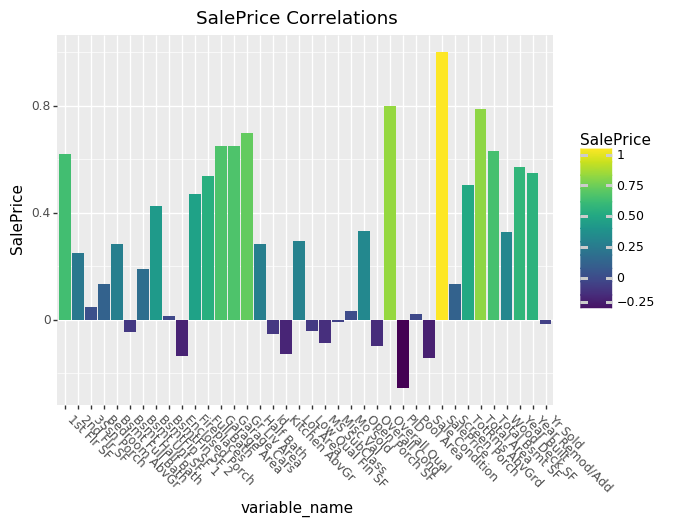

<ggplot: (292593202)>

In [22]:
(ggplot(train_corr, aes(x='variable_name', y='SalePrice')) + aes(fill='SalePrice')
 + geom_col() + theme(axis_text_x=element_text(angle=-45, hjust=0))) + labs(title='SalePrice Correlations')

Among the variables most correlated with SalePrice are Total Area, Garage Area, Garage Cars, TotRms AbvGrd, Full Bath, Gr Liv Area, Year Remod/Add, Year Built and Overall Qual. Let's choose these variables as features for our regression model.

Next, let's visualize the relationship between Total Area and SalePrice.

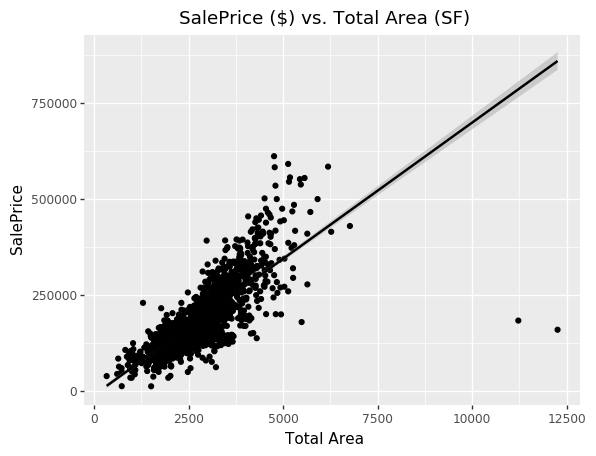

<ggplot: (-9223372036565155752)>

In [23]:
(ggplot(train, aes(x = 'Total Area', y = 'SalePrice')) +
    geom_point() + stat_smooth()) + labs(title='SalePrice ($) vs. Total Area (SF)') 

As we can see, SalePrice is positively correlated with Total Area with a steep slope. 

## Step 5: Regression Model

In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

Let's choose the 9 variables we found were highly correlated with SalePrice as our features.

In [25]:
features = ['Total Area', 'Garage Area', 'Garage Cars', 'TotRms AbvGrd', 'Full Bath', 'Gr Liv Area', 'Year Remod/Add', 'Year Built', 'Overall Qual']
X_train = train[features]
y = train['SalePrice']

Let's fit a linear regression model using a 10-fold cross-validation and examine what our average RMSE is.

In [26]:
lm = LinearRegression()
kf_shuffle = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(lm, X_train, y, scoring ='neg_mean_squared_error', cv=kf_shuffle)
np.sqrt(np.mean(scores) * -1)

36999.495871089195

In [28]:
model = lm.fit(X_train, y)
X_test = test[features]
predictions = model.predict(X_test)
test['SalePrice'] = predictions
test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

The model might be underfitting the data. Let's choose more features and see if we can reduce the RMSE.

In [29]:
features = ['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
X_train = train[features]
y = train['SalePrice']
lm = LinearRegression()
kf_shuffle = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(lm, X_train, y, scoring ='neg_mean_squared_error', cv=kf_shuffle)
np.sqrt(np.mean(scores) * -1)

35610.797647225001

In [30]:
model = lm.fit(X_train, y)
X_test = test[features]
predictions = model.predict(X_test)
test['SalePrice'] = predictions
test[['Id', 'SalePrice']].to_csv('submission2.csv', index=False)

A significant improvement. Let's fit a Lasso to potentially zero out several features and reduce our error if the model is overfitting the data.

First, we have to standardize our features so that their scale doesn't affect the regularization.

In [32]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)

In [33]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs_train, y)
print(optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1244.77296124


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [34]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, Xs_train, y, scoring ='neg_mean_squared_error', cv=kf_shuffle)
np.sqrt(np.mean(lasso_scores) * -1)

35363.008178569646

In [35]:
lasso.fit(Xs_train,y)
predictions = lasso.predict(Xs_test)
test['SalePrice'] = predictions
test[['Id', 'SalePrice']].to_csv('lassosubmission.csv', index=False)

A slight reduction in RMSE. As a final attempt to improve, let's use an Ridge on our new features.

In [36]:
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs_train, y)
print(optimal_ridge.alpha_)

434.701315813


In [37]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, Xs_train, y, scoring ='neg_mean_squared_error', cv=kf_shuffle)
np.sqrt(np.mean(ridge_scores) * -1)

35429.710685060549

In [38]:
ridge.fit(Xs_train,y)
predictions = ridge.predict(Xs_test)
test['SalePrice'] = predictions
test[['Id', 'SalePrice']].to_csv('ridge2submission.csv', index=False)

Slightly higher RMSE than the Lasso. These are a few regression models that predict the SalePrice and have been submitted them to the Kaggle Competition.

## Step 6: Classification Model

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

Per the correlation matrix from before (train_corr), the variables are not highly correlated with Sale Condition, so a K nearest neighbors model makes sense for classification since it's non-parametric. Let's choose all variables with positive correlations with Sale Condition as our features for our classification model.

In [43]:
y = train['Sale Condition']
features = ['MS SubClass', 'Lot Area','Overall Qual', 'Overall Cond', 'Year Built',  'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
X = train[features] 
X_test = test[features]

In [46]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=1, stratify=y)

Let's standardize our features before fitting the KNN model.

In [47]:
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_holdout_scaled = ss.transform(X_holdout)

In [48]:
knn = KNeighborsClassifier()

In [50]:
cross_val_score(knn, X_train_scaled, y_train, cv=kf_shuffle).mean()

0.93361768950004242

Let's do a grid search for the optimal hyperparamaters and see if that improves our accuracy.

In [51]:
params ={'n_neighbors': [5, 6, 7, 8, 9, 10], 'p': [1,2], 'weights': ['uniform', 'distance']}
gs = GridSearchCV(knn, params)
gs.fit(X_train_scaled, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
0.936197916667


In [52]:
gs.score(X_holdout_scaled, y_holdout)

0.935546875

We see a marginal improvement.

In [53]:
X_test_scaled = ss.transform(X_test)

In [54]:
predictions = gs.predict(X_test_scaled)

In [55]:
test['Sale Condition'] = predictions

In [56]:
test[['Id', 'Sale Condition']].to_csv('knnsubmission.csv', index=False)

This classification model that predicts Sale Condition has been submitted to the Kaggle Competition.